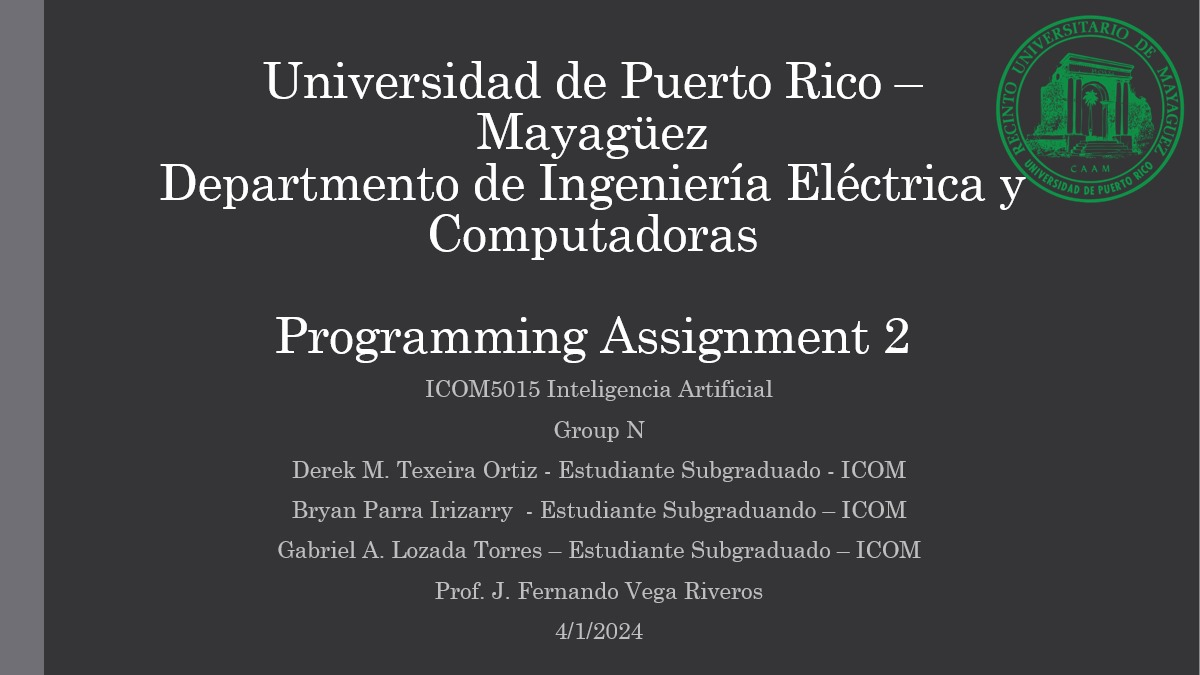

# Resumen 

En el proyecto anterior, se emplearon agentes reflejos. Estos agentes son los más simples ya que actúan en función de su percepción, lo que resultó en buenos resultados en entornos pequeños como en el caso del mundo de la aspiradora. Sin embargo, es probable que estos agentes no sean efectivos en entornos con un mapeo demasiado grande para almacenar o que requiera un largo tiempo para aprenderlo. Por lo tanto, los agentes basados en metas consideran las acciones futuras y la conveniencia de sus resultados. En este trabajo, se enfoca en resolver problemas mediante el método de búsqueda utilizando agentes basados en metas. Estos agentes perciben los estados del mundo como un todo, sin una estructura interna visible para los algoritmos de resolución de problemas. Los agentes basados en metas más avanzados que emplean representaciones factorizadas o estructuradas se conocen como agentes de planificación. Se utilizarán varios algoritmos de búsqueda de propósito general, incluidos los algoritmos de búsqueda no informados, que resuelven problemas basándose únicamente en sus definiciones. Aunque estos algoritmos pueden resolver cualquier problema solucionable, no son muy eficientes. Por el contrario, los algoritmos de búsqueda informados funcionan mejor al proporcionar orientación sobre dónde buscar soluciones [1].

# Introducción 

En entornos deterministas, observables, estáticos y completamente conocidos, los agentes pueden seleccionar acciones utilizando diversos métodos. La búsqueda implica la construcción de secuencias de acciones para alcanzar los objetivos del agente. Antes de iniciar la búsqueda, el agente debe definir claramente el problema, que consta de un estado inicial, acciones posibles, modelo de transición, función de meta y función de costo de ruta. Los algoritmos de búsqueda consideran estados y acciones como unidades individuales y no exploran su estructura interna. Existen algoritmos de búsqueda no informada, como la búsqueda primero en amplitud, la búsqueda de costo uniforme y la búsqueda primero en profundidad, así como algoritmos informados, como la mejor búsqueda primero, la búsqueda A* y otros, que utilizan heurísticas para estimar el costo de soluciones. La calidad de la función heurística afecta el rendimiento de estos algoritmos. El rendimiento de los algoritmos de búsqueda heurística depende de la calidad de la función heurística, que a veces se puede construir relajando la definición del problema [1]. Este trabajo tiene como objetivo comparar y visualizar el comportamiento de los algoritmos de búsqueda informados a través de ejercicios específicos.

# Ejercicio 3.7 

Considere el problema de encontrar el camino más corto entre dos puntos en un plano que tiene obstáculos poligonales convexos como se muestra en la Figura 3.31. Esta es una idealización del problema que tiene que resolver un robot para navegar en un entorno lleno de gente.

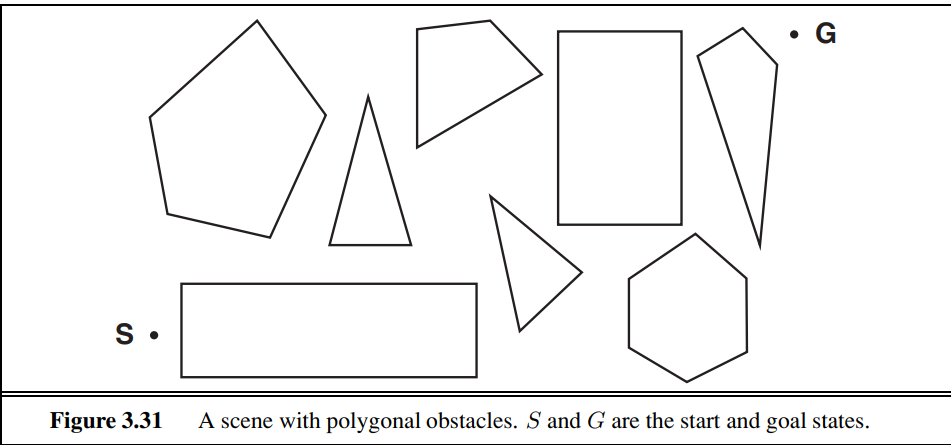

a. Suponga que el espacio de estado consta de todas las posiciones (x,y) en el plano. ¿Cuántos estados hay? ¿Cuántos caminos hay hasta la meta?

Si miramos todas las ubicaciones posibles (x, y) en el plano, habría un número infinito de situaciones y un número infinito de rutas para alcanzar el objetivo.

b. Explique brevemente por qué el camino más corto de un vértice de un polígono a cualquier otro en la escena debe consistir en segmentos de línea recta que unen algunos de los vértices de los polígonos. Defina un buen espacio de estado ahora. ¿Qué tan grande es este espacio de estado?

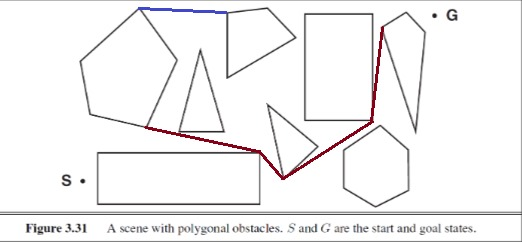

En un plano, la distancia más corta entre dos puntos es una línea recta que los conecta. Si no hay un polígono que obstruya entre dos vértices, el camino más corto consistirá en un solo segmento, como en el caso del camino azul. Sin embargo, si hay un polígono obstruyendo, el camino más corto será una unión de segmentos de línea, como en el caso del camino rojo. Es importante notar que puede haber más de un camino posible, pero el óptimo es aquel en el que la distancia Euclidiana es mínima.

Con esta nueva definición de camino, el espacio de estado estaría compuesto por el conjunto de vértices de los polígonos. La dimensión del estado sería el número de vértices, más el estado inicial y el estado objetivo, los cuales sumarían un total de 35.

c. Defina las funciones necesarias para implementar el problema de búsqueda, incluida una función ACTIONS que toma un vértice como entrada y devuelve un conjunto de vectores, cada uno de los cuales asigna el vértice actual a uno de los vértices que se pueden alcanzar en línea recta. (No olvide los vecinos en el mismo polígono). Use la distancia en línea recta para la función heurística.


function ACTIONS(vertex)

    neighborsVertex = []
    for i=0 to numVertex do

        if there is a straight-line path between vertex and setVertex(i):

            neighborsVertex.append(setVertex(i))
            return neighborsVertex

- Vértice (vertex): Es un punto o estado en tu problema de búsqueda.
- Vecinos del vértice (neighborsVertex): Son los vértices a los que se puede llegar desde un vértice dado con un solo segmento.
- Número de vértices (numVertex): Es la cantidad total de vértices en tu espacio de estado.
- Conjunto de vértices (setVertex): Es el conjunto que contiene todos los vértices en tu espacio de estado.
- setVertex(i): Devuelve el vértice en la posición i en el conjunto de vértices.
- Las funciones proporcionadas para resolver problemas de búsqueda son:

- Método "actions" en la clase "Problem": Este método devuelve las acciones posibles desde un estado dado, es decir, los vecinos del vértice en tu problema.
- Función "straight_line_distance": Calcula la distancia en línea recta entre dos puntos en el plano, lo cual puede ser útil para calcular estimaciones de distancia en algunos algoritmos de búsqueda.
- Algoritmos de búsqueda: Incluyen algoritmos como la búsqueda en amplitud (breadth_first_search), la búsqueda del mejor primer resultado (best_first_search) y la búsqueda uniforme de costos (uniform_cost_search).

Estas herramientas te permiten diseñar y resolver problemas de búsqueda en un espacio definido por vértices de polígonos.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import random
import heapq
import math
import sys
from collections import defaultdict, deque, Counter
from itertools import combinations


class Problem(object):
    """The abstract class for a formal problem. A new domain subclasses this,
    overriding `actions` and `results`, and perhaps other methods.
    The default heuristic is 0 and the default action cost is 1 for all states.
    When yiou create an instance of a subclass, specify `initial`, and `goal` states 
    (or give an `is_goal` method) and perhaps other keyword args for the subclass."""

    def __init__(self, initial=None, goal=None, **kwds): 
        self.__dict__.update(initial=initial, goal=goal, **kwds) 
        
    def actions(self, state):        raise NotImplementedError
    def result(self, state, action): raise NotImplementedError
    def is_goal(self, state):        return state == self.goal
    def action_cost(self, s, a, s1): return 1
    def h(self, node):               return 0
    
    def __str__(self):
        return '{}({!r}, {!r})'.format(
            type(self).__name__, self.initial, self.goal)
    

class Node:
    "A Node in a search tree."
    def __init__(self, state, parent=None, action=None, path_cost=0):
        self.__dict__.update(state=state, parent=parent, action=action, path_cost=path_cost)

    def __repr__(self): return '<{}>'.format(self.state)
    def __len__(self): return 0 if self.parent is None else (1 + len(self.parent))
    def __lt__(self, other): return self.path_cost < other.path_cost
    
    
failure = Node('failure', path_cost=math.inf) # Indicates an algorithm couldn't find a solution.
cutoff  = Node('cutoff',  path_cost=math.inf) # Indicates iterative deepening search was cut off.
    
    
def expand(problem, node):
    "Expand a node, generating the children nodes."
    s = node.state
    for action in problem.actions(s):
        s1 = problem.result(s, action)
        cost = node.path_cost + problem.action_cost(s, action, s1)
        yield Node(s1, node, action, cost)
        

def path_actions(node):
    "The sequence of actions to get to this node."
    if node.parent is None:
        return []  
    return path_actions(node.parent) + [node.action]


def path_states(node):
    "The sequence of states to get to this node."
    if node in (cutoff, failure, None): 
        return []
    return path_states(node.parent) + [node.state]

In [17]:


class PriorityQueue:
    """A queue in which the item with minimum f(item) is always popped first."""

    def __init__(self, items=(), key=lambda x: x): 
        self.key = key
        self.items = [] # a heap of (score, item) pairs
        for item in items:
            self.add(item)
         
    def add(self, item):
        """Add item to the queuez."""
        pair = (self.key(item), item)
        heapq.heappush(self.items, pair)

    def pop(self):
        """Pop and return the item with min f(item) value."""
        return heapq.heappop(self.items)[1]
    
    def top(self): return self.items[0][1]

    def __len__(self): return len(self.items)
    
FIFOQueue = deque

LIFOQueue = list

In [18]:
def breadth_first_search(problem):
    "Search shallowest nodes in the search tree first."
    node = Node(problem.initial)
    if problem.is_goal(problem.initial):
        return node
    frontier = FIFOQueue([node])
    reached = {problem.initial}
    while frontier:
        node = frontier.pop()
        for child in expand(problem, node):
            s = child.state
            if problem.is_goal(s):
                return child
            if s not in reached:
                reached.add(s)
                frontier.appendleft(child)
    return failure

def g(n): return n.path_cost


def best_first_search(problem, f):
    "Search nodes with minimum f(node) value first."
    node = Node(problem.initial)
    frontier = PriorityQueue([node], key=f)
    reached = {problem.initial: node}
    while frontier:
        node = frontier.pop()
        if problem.is_goal(node.state):
            return node
        for child in expand(problem, node):
            s = child.state
            if s not in reached or child.path_cost < reached[s].path_cost:
                reached[s] = child
                frontier.add(child)
    return failure


def uniform_cost_search(problem):
    "Search nodes with minimum path cost first."
    return best_first_search(problem, f=g)

In [19]:
class RouteProblem(Problem):
    """A problem to find a route between locations on a `Map`.
    Create a problem with RouteProblem(start, goal, map=Map(...)}).
    States are the vertexes in the Map graph; actions are destination states."""
    
    def actions(self, state): 
        """The places neighboring `state`."""
        #print(self.map.neighbors[state])#añadido para ver
        return self.map.neighbors[state]
    
    def result(self, state, action):
        """Go to the `action` place, if the map says that is possible."""
        return action if action in self.map.neighbors[state] else state
    
    def action_cost(self, s, action, s1):
        """The distance (cost) to go from s to s1."""
        return self.map.distances[s, s1]
    
    def h(self, node):
        "Straight-line distance between state and the goal."
        locs = self.map.locations
        return straight_line_distance(locs[node.state], locs[self.goal])
    
    
def straight_line_distance(A, B):
    "Straight-line distance between two points."
    return sum(abs(a - b)**2 for (a, b) in zip(A, B)) ** 0.5

In [20]:
class Map:
    """A map of places in a 2D world: a graph with vertexes and links between them. 
    In `Map(links, locations)`, `links` can be either [(v1, v2)...] pairs, 
    or a {(v1, v2): distance...} dict. Optional `locations` can be {v1: (x, y)} 
    If `directed=False` then for every (v1, v2) link, we add a (v2, v1) link."""

    def __init__(self, links, locations=None, directed=False):
        if not hasattr(links, 'items'): # Distances are 1 by default
            links = {link: 1 for link in links}
        if not directed:
            for (v1, v2) in list(links):
                links[v2, v1] = links[v1, v2]
        self.distances = links
        self.neighbors = multimap(links)
        self.locations = locations or defaultdict(lambda: (0, 0))
        
        
        
def multimap(pairs) -> dict:
    "Given (key, val) pairs, make a dict of {key: [val,...]}."
    result = defaultdict(list)
    for key, val in pairs:
        result[key].append(val)
    return result 

d. Aplique uno o más de los algoritmos de este capítulo para resolver una variedad de problemas en el dominio y comente su desempeño. 

 Este problema se puede formular de manera similar al ejemplo Romania, en este caso cada uno de los vertices se comportaria de manera similar a las ciudades. Este código define un conjunto de relaciones entre los vértices de un mapa, donde los vértices están representados por letras ('S', 'V1', 'V2', etc.) y las relaciones están indicadas por pares de vértices y sus distancias asociadas. Por ejemplo, la relación ('S', 'V1'): 1 indica que hay una conexión directa entre el vértice 'S' y el vértice 'V1' con una distancia de 1 unidad. El objetivo es encontrar el camino más corto entre el vértice 'S' y el vértice 'G' utilizando diferentes algoritmos de búsqueda.

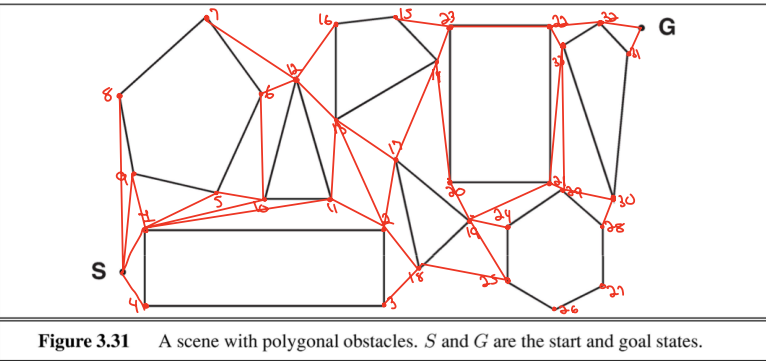

Figura 1. Mapa 

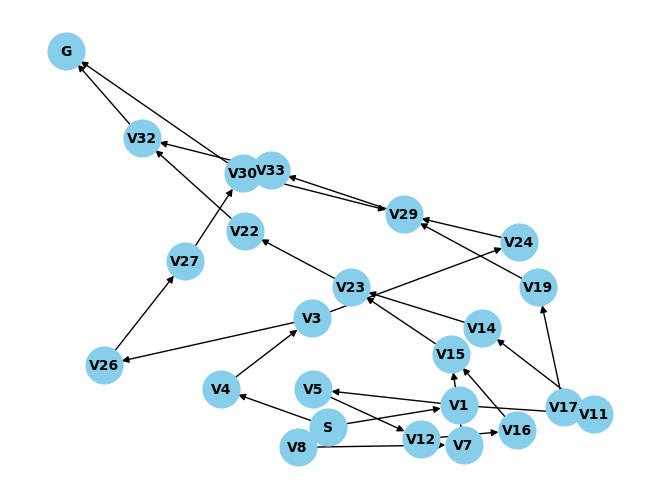

In [21]:
Figuras = Map(
    {('S', 'V1'):  1, ('S', 'V4'): 1, ('S', 'V8'): 1, ('V1', 'V5'): 1, ('V1', 'V11'): 1, 
     ('V4', 'V3'): 1, ('V5', 'V12'):  1, ('V8', 'V7'): 1, ('V7', 'V15'): 1, ('V12', 'V16'): 1, 
     ('V16', 'V15'): 1, ('V15', 'V23'):  1, ('V11', 'V14'): 1, ('V11', 'V17'): 1, ('V14', 'V23'): 1, 
     ('V23', 'V22'):  1, ('V22', 'V32'):  1, ('V17', 'V19'): 1, ('V19', 'V29'):  1, ('V3', 'V24'): 1, 
     ('V24', 'V29'):  1, ('V3', 'V26'):  1, ('V26', 'V27'): 1, ('V3', 'V26'):  1, ('V26', 'V27'): 1, 
     ('V27', 'V30'):  1, ('V30', 'V29'): 1, ('V29', 'V33'):  1, ('V33', 'V32'): 1, ('V32', 'G'): 1, ('V30', 'G'): 1})

r0 = RouteProblem('S', 'G', map=Figuras)


# Printing the map
#-----------------------
# import matplotlib.pyplot as plt
# import networkx as nx
# edges = [('S', 'V1'), ('S', 'V4'), ('S', 'V8'), ('V1', 'V5'), ('V1', 'V11'),
#          ('V4', 'V3'), ('V5', 'V12'), ('V8', 'V7'), ('V7', 'V15'), ('V12', 'V16'),
#          ('V16', 'V15'), ('V15', 'V23'), ('V11', 'V14'), ('V11', 'V17'), ('V14', 'V23'),
#          ('V23', 'V22'), ('V22', 'V32'), ('V17', 'V19'), ('V19', 'V29'), ('V3', 'V24'),
#          ('V24', 'V29'), ('V3', 'V26'), ('V26', 'V27'), ('V27', 'V30'), ('V30', 'V29'),
#          ('V29', 'V33'), ('V33', 'V32'), ('V32', 'G'), ('V30', 'G')]

# G = nx.DiGraph()
# G.add_edges_from(edges)

# pos = nx.spring_layout(G)
# nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=10, font_weight='bold', arrowsize=10)
# plt.show()
# #------------------------


In [ ]:
path_states(uniform_cost_search(r0))

['S', 'V4', 'V3', 'V24', 'V29', 'V30', 'G']

In [28]:
path_states(breadth_first_search(r0))

['S', 'V1', 'V11', 'V14', 'V23', 'V22', 'V32', 'G']

Para este ejercicio, con las distancias iguales, las dos busquedad fueron por rutas distintas. 

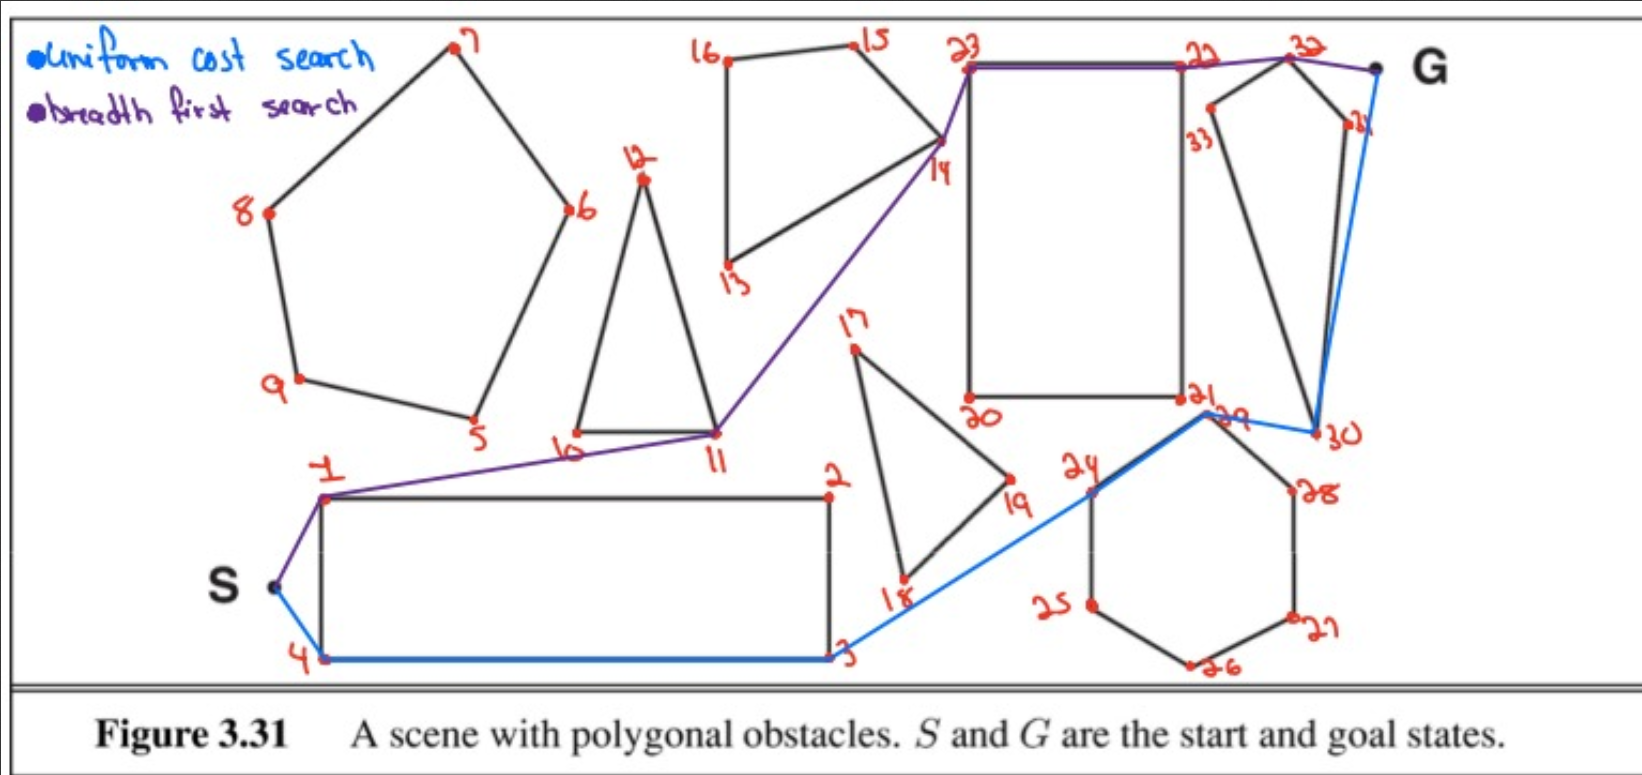

Figura 2. Ruta de búsqueda de los algoritmos de búsqueda

Con el objetivo de considerar las distancias, se elaboro un plano cartesiano del entorno de donde se asumio las coordenadas y distancias entre vertices. El codigo de abajo muestra el plano cartesiano realizado.

In [24]:
# Considerando las distancias 

Figuras2 = Map(
    {('S', 'V1'):  3.354, ('S', 'V4'): 2.5, ('S', 'V8'): 12, ('V1', 'V5'): 5.59, ('V1', 'V11'): 13.153, 
     ('V4', 'V3'): 16, ('V5', 'V12'):  9.01, ('V8', 'V7'): 7.81, ('V7', 'V15'): 13, ('V12', 'V16'): 4.61, 
     ('V16', 'V15'): 4.03, ('V15', 'V23'):  4.16, ('V11', 'V14'): 11.4, ('V11', 'V17'): 4.472, ('V14', 'V23'): 2.236, 
     ('V23', 'V22'):  6, ('V22', 'V32'):  4, ('V17', 'V19'): 6.403, ('V19', 'V29'):  6.708, ('V3', 'V24'): 9.434, 
     ('V24', 'V29'):  5, ('V3', 'V26'):  11, ('V26', 'V27'): 4.123, ('V26', 'V27'): 4.123, 
     ('V27', 'V30'):  6, ('V30', 'V29'): 3.162, ('V29', 'V33'):  9, ('V33', 'V32'): 3.162, ('V32', 'G'): 2, ('V30', 'VG'): 11.18},
    {'S': (8.5, 3),'V1': (10, 6),'V2': (26, 6),'V3': (26, 1),'V4': (10, 1),'V5': (15, 8.5),
     'V6': (18, 15),'V7': (14, 20),'V8': (8, 15),'V9': (9.5, 8.5),'V10': (18, 8),'V11': (23, 8),
     'V12': (20, 16),'V13': (23, 13),'V14': (30, 17),'V15': (27, 20),'V16': (23, 19.5),'V17': (27, 10),
     'V18': (28, 3),'V19': (32, 6),'V20': (31, 9),'V21': (37, 9),'V22': (37, 19),'V23': (31, 19),
     'V24': (34, 6),'V25': (34, 2),'V26': (37, 1),'V27': (41, 2),'V28': (41, 6),'V29': (38, 9),
     'V30': (41, 8),'V31': (42, 17.5),'V32': (41, 19),'V33': (38, 18),'G': (43, 19)})

r0 = RouteProblem('S', 'G', map=Figuras2)

In [25]:
path_states(uniform_cost_search(r0))

['S', 'V1', 'V11', 'V14', 'V23', 'V22', 'V32', 'G']

In [26]:
path_states(breadth_first_search(r0))

['S', 'V1', 'V11', 'V14', 'V23', 'V22', 'V32', 'G']

Para este ejercicio, en el cual se cambiaron las distancias de los valores, de igual forma fueron por el mismo camino. 

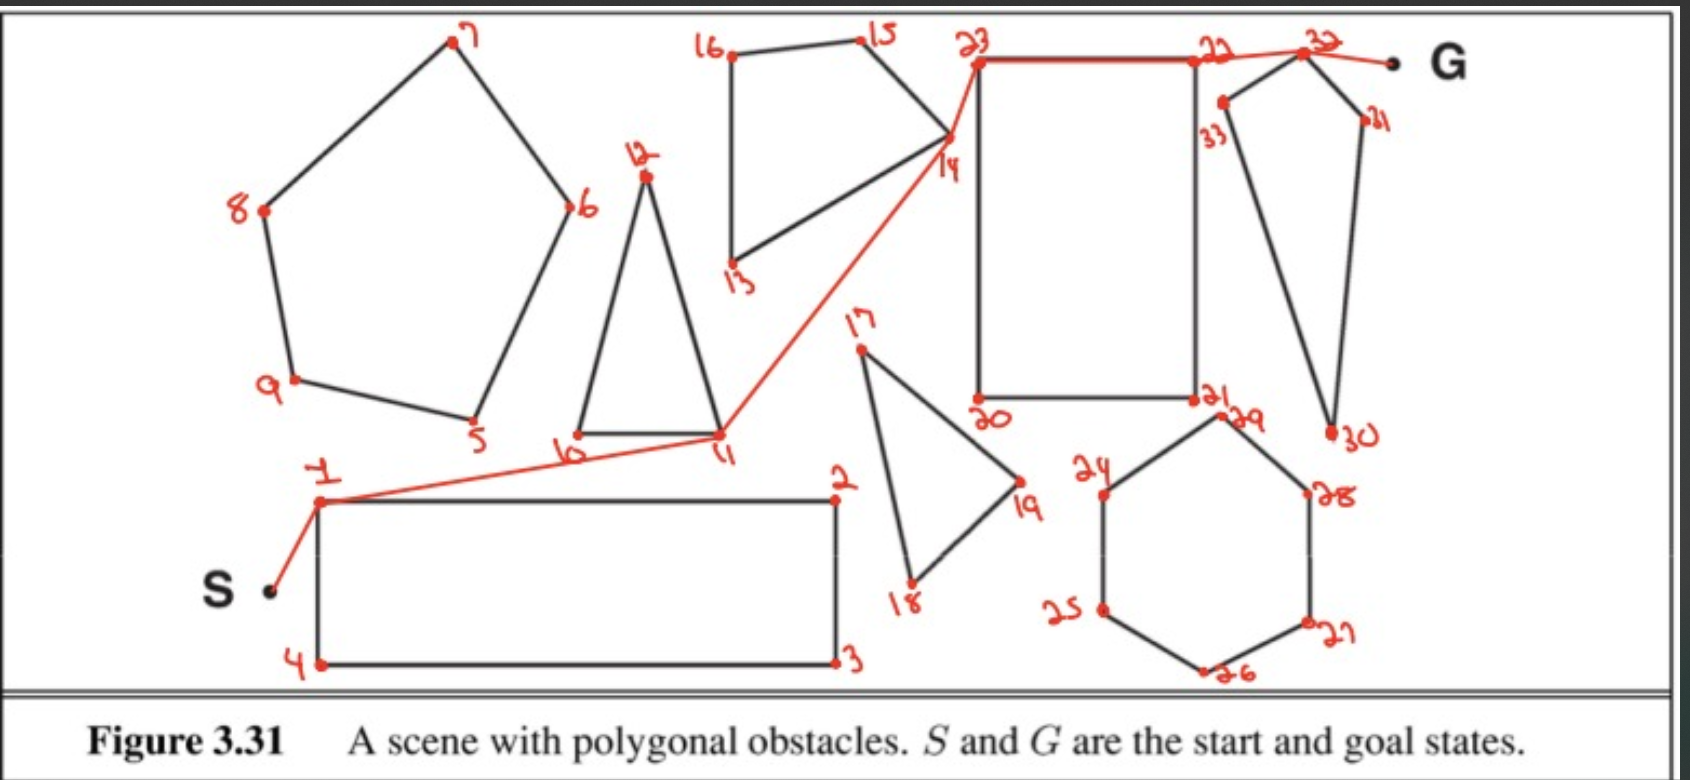

Figura 3. Ruta de búsqueda de los algoritmos de búsqueda

# Ejercicio 3.9 

El problema de los misioneros y los caníbales suele plantearse de la siguiente manera. Tres misioneros y tres caníbales están a un lado de un río, junto con un bote que puede llevar a una o dos personas. Encuentre una manera de llevar a todos al otro lado sin dejar nunca a un grupo de misioneros en un lugar superado en número por los caníbales en ese lugar. Este problema es famoso en IA porque fue el tema del primer artículo que abordó la formulación de problemas desde un punto de vista analítico (Amarel, 1968).

a. Formule el problema con precisión, haciendo solo las distinciones necesarias para asegurar una solución válida. Dibuje un diagrama del espacio de estado completo.



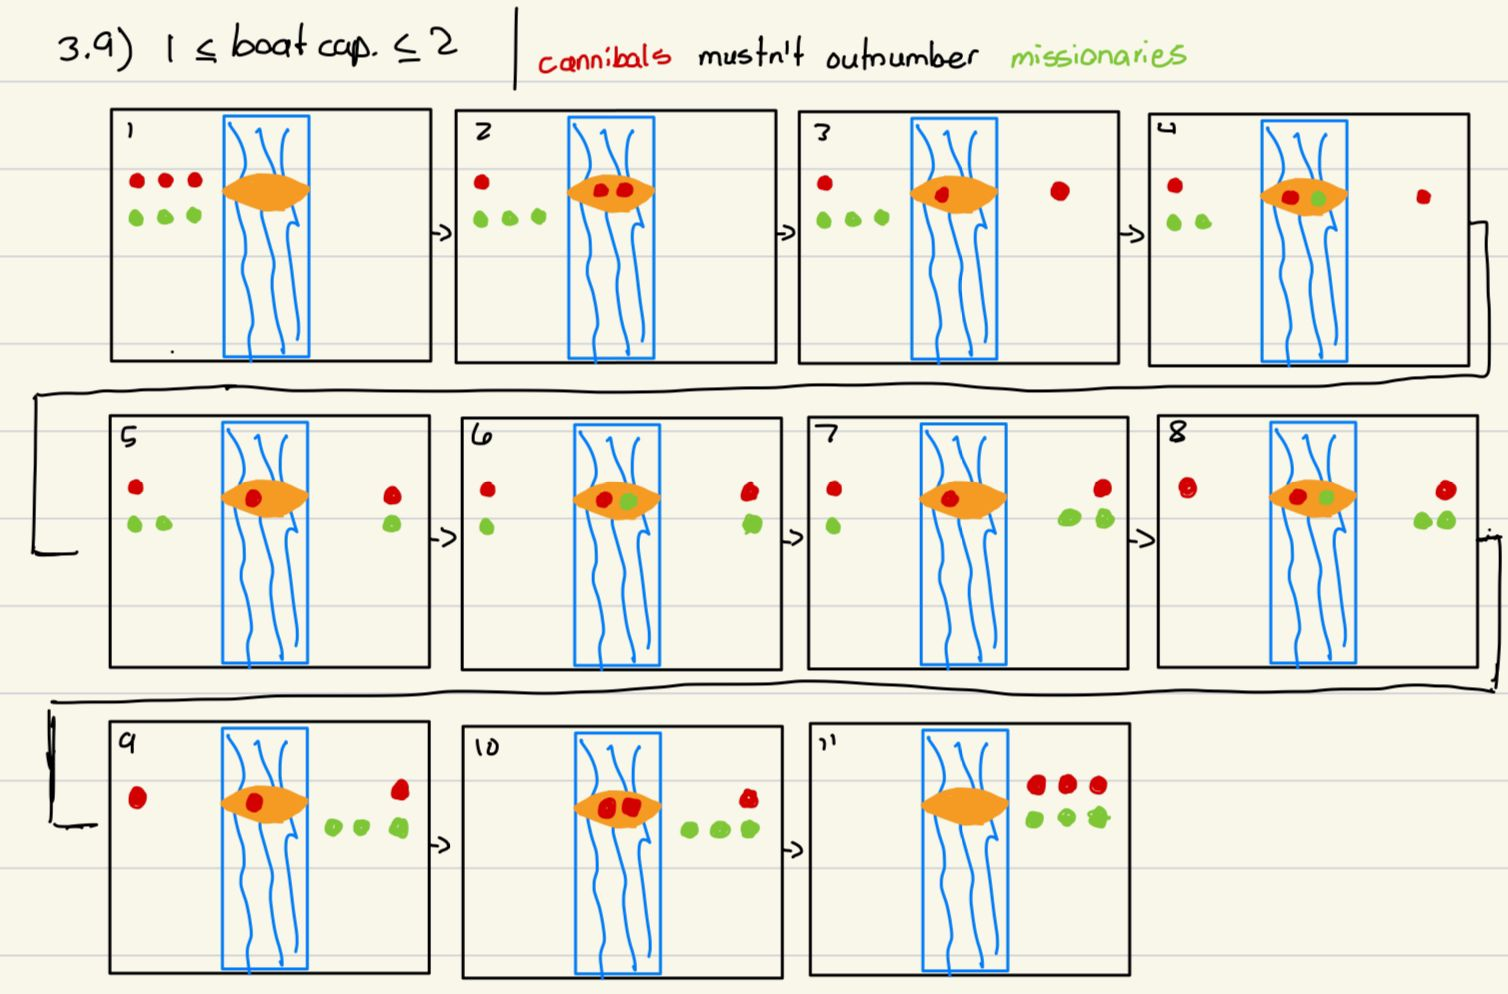

Figura 4. Diagrama del espacio de estado completo

b. Implementar y resolver el problema de manera óptima utilizando un algoritmo de búsqueda adecuado. ¿Es una buena idea comprobar si hay estados repetidos?

Para la implementación del programa que resuelve el problema, se utilizó el algoritmo Depth First Search (DFS). Este algoritmo se implementó utilizando un ciclo while que se ejecuta de manera continua y dos ciclos while anidados. Estos ciclos se encargan de gestionar los datos ingresados por el jugador, como la cantidad de misioneros y caníbales que participan en un viaje de un lado del río al otro. El algoritmo DFS se utiliza para explorar todas las posibles combinaciones de movimientos de misioneros y caníbales hasta que se alcanza el estado final o, en su defecto, el juego se pierde porque los caníbales han comido a los misioneros.

In [29]:
print("\nEjercicio 3.9")
print("\n El objetivo de este ejercicio es cruzar a los misioneros y a los canibales en un barco sin que la cantidad de \n canibales en un lado sea mayor que la cantidad de misioneros.")
print("\n Cabe destacar que el barco tiene una capacidad máxima de 2 y requiere al menos una persona a bordo para moverse.")

left_missionaries = 3
left_cannibals = 3
right_missionaries = 0
right_cannibals = 0
trips = 0

print("\nEstado Inicial:")
print("\nM M M C C C | --- | \n")

try:
    while True:
        while True:
            print("Lado izquierdo -> Lado derecho")
            u_missionaries = int(input("Ingrese el número de misioneros en el viaje => "))
            u_cannibals = int(input("Ingrese el número de caníbales en el viaje => "))

            if u_missionaries == 0 and u_cannibals == 0:
                print("El bote no puede cruzar vacio.")
            elif (u_missionaries + u_cannibals) <= 2 and (left_missionaries - u_missionaries) >= 0 and (left_cannibals - u_cannibals) >= 0:
                break
            else:
                print("Movimiento indeterminado. Por favor, ingrese una nueva entrada.")

        left_missionaries -= u_missionaries
        left_cannibals -= u_cannibals
        right_missionaries += u_missionaries
        right_cannibals += u_cannibals

        print("\n")
        print("M " * left_missionaries + "C " * left_cannibals + "| --> | " + "M " * right_missionaries + "C " * right_cannibals + "\n")

        trips += 1

        if (left_cannibals == 3 and left_missionaries in [1, 2]) or (right_cannibals == 3 and right_missionaries in [1, 2]):
            print("Los caníbales se comieron a los misioneros:\nFin del ejercicio.")
            break

        if left_missionaries == 0 and left_cannibals == 0:
            print("Has completado el ejercicio con éxito.")
            print("Total de viajes:", trips)
            break

        while True:
            print("Lado derecho -> Lado izquierdo")
            user_missionaries = int(input("Ingrese el número de misioneros en el viaje => "))
            user_cannibals = int(input("Ingrese el número de caníbales en el viaje  => "))

            if user_missionaries == 0 and user_cannibals == 0:
                print("El bote no puede cruzar vacio.")
            elif (user_missionaries + user_cannibals) <= 2 and (right_missionaries - user_missionaries) >= 0 and (right_cannibals - user_cannibals) >= 0:
                break
            else:
                print("Movimiento indeterminado. Por favor, ingrese una nueva entrada.")

        left_missionaries += user_missionaries
        left_cannibals += user_cannibals
        right_missionaries -= user_missionaries
        right_cannibals -= user_cannibals

        trips += 1

        print("\n")
        print("M " * left_missionaries + "C " * left_cannibals + "| <-- | " + "M " * right_missionaries + "C " * right_cannibals + "\n")

        if (left_cannibals == 3 and left_missionaries in [1, 2]) or (right_cannibals == 3 and right_missionaries in [1, 2]):
            print("Los caníbales se comieron a los misioneros:\nFin del ejercicio.")
            break

except EOFError as e:
    print("\nEntrada inválida, pruebe otro movimiento.")

c. ¿Por qué crees que a la gente le cuesta resolver este rompecabezas, dado que el espacio de estado es tan simple?

Aunque el problema tiene un espacio de estados relativamente pequeño y simple, puede resultar difícil de resolver debido a su naturaleza engañosa. Requiere una planificación cuidadosa y anticipada para evitar situaciones donde los caníbales superen en número a los misioneros en cualquiera de los lados del río. Además, implica la interacción de múltiples agentes (misioneros y caníbales) que deben coordinarse entre sí para lograr el objetivo, lo que complica el análisis de las posibles acciones y sus consecuencias. Por último, hay múltiples soluciones válidas para el problema, lo que dificulta encontrar la mejor opción. En resumen, debido a su naturaleza combinativa y la necesidad de una planificación y coordinación meticulosas, el problema puede ser un desafío para resolverlo.


## Discusión



En el primer ejercicio, se observa que el espacio de estados comprende todas las posiciones posibles (x, y) en el plano, lo que resulta en un número infinito de estados debido a la infinitud de los valores que pueden tomar tanto x como y. El número de caminos hacia el objetivo varía dependiendo de las posiciones de inicio y meta, pero dada la infinitud de estados, habrá una cantidad extremadamente grande de caminos posibles. Por lo tanto, para encontrar el camino más corto entre dos vértices de un polígono en la escena, se concluye que debe consistir en segmentos de línea recta que conecten algunos de los vértices de los polígonos, ya que los obstáculos son convexos. Esto implica que cualquier segmento de línea que una dos puntos dentro del obstáculo permanecerá completamente dentro de él. Se sugiere que un buen espacio de estado para este problema sería considerar todos los posibles caminos que conectan los vértices de los polígonos. El tamaño de este espacio de estados dependerá del número de vértices y de la complejidad de los obstáculos poligonales.

Se emplearon los algoritmos de búsqueda "uniform_cost_search" y "breadth_first_search" para encontrar la mejor ruta en el problema presentado. En una primera búsqueda, donde se asignó una distancia de 1 a todas las secciones del camino, ambos algoritmos produjeron rutas diferentes. A pesar de estas diferencias, al sumar las distancias, se obtuvo la misma distancia total en ambos casos. Por lo tanto, ambos algoritmos cumplieron su objetivo de manera óptima. En una segunda instancia, se asignaron distancias aleatorias a cada tramo del camino, las cuales se obtuvieron mediante un plano cartesiano del entorno. En esta ocasión, ambos algoritmos proporcionaron la misma ruta, logrando así la ruta óptima y cumpliendo su objetivo.

En el segundo ejercicio, se abordó el problema utilizando algoritmos de búsqueda, como el Depth First Search (DFS) y el Breadth First Search (BFS). En este caso particular, se implementó el algoritmo DFS, que involucra un bucle while que se ejecuta continuamente y dos bucles while anidados para manejar la entrada del jugador, como la cantidad de misioneros y caníbales participantes en cada viaje de un lado del río al otro. El DFS se utilizó para explorar todas las posibles combinaciones de movimientos de misioneros y caníbales hasta alcanzar el estado final o hasta que el juego se perdiera debido a que los caníbales superaran en número a los misioneros.

# Conclusion


Los ejercicios resaltaron que resolver problemas puede requerir una variedad de técnicas y enfoques, dependiendo de la naturaleza específica del problema. Por ejemplo, se demostró que los agentes reflejos son adecuados para situaciones donde el mapeo directo de estado a acción es simple, mientras que los agentes basados en objetivos pueden considerar resultados futuros y tomar decisiones en función de esas predicciones. Además, se destacó que los agentes de resolución de problemas pueden utilizar representaciones básicas para modelar estados, pero para los agentes de planificación, pueden ser necesarias representaciones más avanzadas.

En el primer ejercicio, se observó que ambos algoritmos utilizados lograron su objetivo de manera óptima. También se notó que cuando hay más de una ruta óptima disponible, la selección de la ruta puede depender del tipo de algoritmo de búsqueda empleado.

En resumen, estos ejercicios ilustraron que la resolución de problemas es un proceso complejo y desafiante que puede necesitar diversas técnicas y estrategias para alcanzar una solución óptima. No obstante, mediante un análisis detenido del problema y la aplicación adecuada de algoritmos y representaciones, podemos superar estos desafíos y obtener soluciones efectivas.

## Referencias 

[1] S. Russell, P. Norvig, “Artificial Intelligence”, 3st ed., Pearson, Ed. Pearson, 2010.

[2] UC Berkeley code repository, “aimacode” https://github.com/aimacode, (accessed: 03.21.2024).